In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import random

### 데이터세트
- emnist/balanced

### 데이터로드

In [2]:
images = np.load('images.npy')
labels = np.load('labels.npy')

### 데이터 분할 및 확인

In [3]:
train_X, valid_X, train_Y, valid_Y = train_test_split(images, labels, train_size = 0.8)
valid_X, test_X, valid_Y, test_Y = train_test_split(valid_X,valid_Y,train_size=0.5)
train_X = np.array(train_X)
valid_X = np.array(valid_X)
test_X = np.array(test_X)
train_Y = np.array(train_Y)
valid_Y = np.array(valid_Y)
test_Y = np.array(test_Y)

print(train_X.shape)
print(valid_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(valid_Y.shape)
print(test_Y.shape)

(90240, 28, 28, 1)
(11280, 28, 28, 1)
(11280, 28, 28, 1)
(90240,)
(11280,)
(11280,)


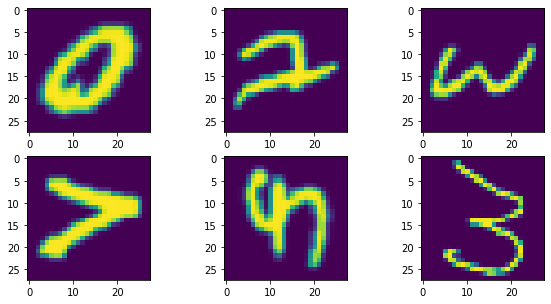

In [12]:
plt.figure(figsize=[10,5])
for idx,img in enumerate(train_X[:6]):
    plt.subplot(2,3,idx+1)
    plt.imshow(img)

### 오토인코더 정의

In [15]:
# 오토인코더 정의 및 학습
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='relu')
])

model.compile(optimizer=tf.optimizers.Adam(1e-3), loss='mse')

### 학습

In [16]:
model.fit(train_X, train_X, epochs=100, batch_size=32)

Epoch 1/100
2820/2820 [==============================] - 11s 4ms/step - loss: 709.9199
Epoch 2/100
2820/2820 [==============================] - 10s 4ms/step - loss: 303.9156
Epoch 3/100
2820/2820 [==============================] - 11s 4ms/step - loss: 272.3027
Epoch 4/100
2820/2820 [==============================] - 11s 4ms/step - loss: 254.6227
Epoch 5/100
2820/2820 [==============================] - 11s 4ms/step - loss: 243.0714
Epoch 6/100
2820/2820 [==============================] - 11s 4ms/step - loss: 234.2493
Epoch 7/100
2820/2820 [==============================] - 11s 4ms/step - loss: 227.6335
Epoch 8/100
2820/2820 [==============================] - 11s 4ms/step - loss: 222.4019
Epoch 9/100
2820/2820 [==============================] - 11s 4ms/step - loss: 218.2460
Epoch 10/100
2820/2820 [==============================] - 11s 4ms/step - loss: 214.6289
Epoch 11/100
2820/2820 [==============================] - 11s 4ms/step - loss: 211.7601
Epoch 12/100
2820/2820 [=================

### 테스트

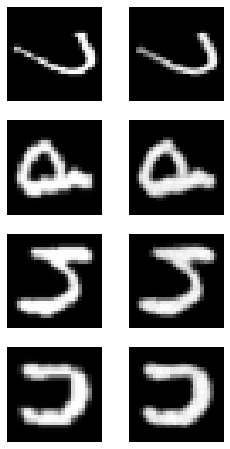

353/353 [==============================] - 1s 2ms/step - loss: 178.2421


178.24205017089844

In [17]:
# 이미지 재생성
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()
model.evaluate(test_X, test_X)

### 클러스터링 수행

In [19]:
# 잠재변수 추출 모델 정의 및 실행
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)

(90240, 64)


In [22]:
# scikit-learn library 사용
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

KMeans(n_clusters=10, random_state=42)

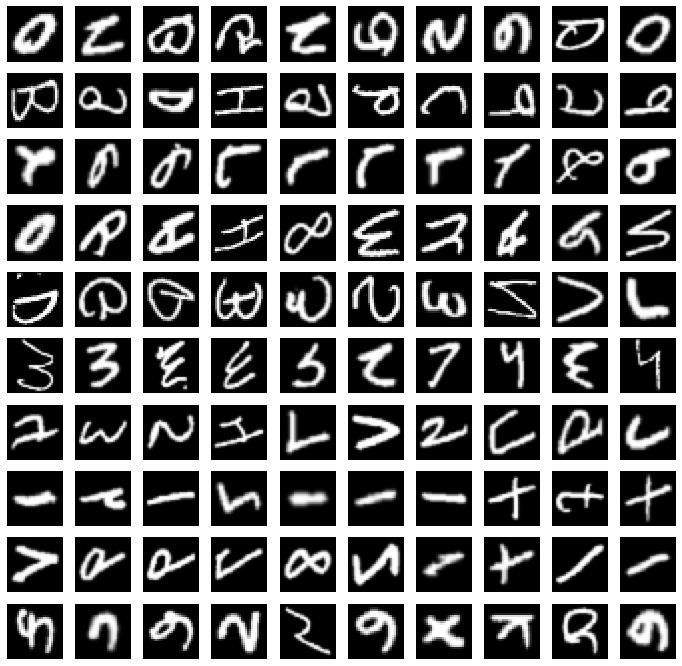

In [23]:
# 클러스터링 결과 확인
plt.figure(figsize=(12,12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28), cmap='gray')
        plt.axis('off')
        
plt.show()